Author: Daniel Abadjiev  
&nbsp;&nbsp;&nbsp; with lots of help from Eliza  
Date: June 3, 2025  
Description: a notebook to test some stuff with smartpixels data and get a handle on the data format/machine learning general things.   

Will partially follow Eliza's github, will also follow this tutorial https://www.tensorflow.org/tutorials/keras/classification

In [1]:
from OptimizedDataGenerator4 import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
print(tf.config.experimental.list_physical_devices())
print(tf.test.is_built_with_cuda())
print(tf.test.is_built_with_gpu_support())
print(tf.test.is_gpu_available())

2025-06-13 11:01:57.055944: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-13 11:01:57.067793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749830517.082265 2103026 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749830517.086613 2103026 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749830517.097163 2103026 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True
True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


I0000 00:00:1749830519.583281 2103026 gpu_device.cc:2019] Created device /device:GPU:0 with 1131 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:4b:00.0, compute capability: 8.6


In [3]:
# data_dir = "../smartpixML/MuonColliderSim/Simulation_Output/";
# tf_dir = "./tfRecDirDaniel"
# labels_dir = "./labelsDirDaniel" #leftover 
# dataFormatter = OptimizedDataGenerator(
#     tf_records_dir=tf_dir,
#     # data_directory_path=data_dir,
#     # file_type="parquet",
#     load_records=True,
#     muon_collider=True,
#     x_feature_description=['cluster','x_profile','x_size'],
#     batch_size=3000,
#     filteringBIB=True
#     )
# dataFormatter.tfrecord_filenames.size

In [4]:
# print(dataFormatter)
# # print(dataFormatter.x_features)
# print(dataFormatter.x_feature_description)
# # dataFormatter.x_features['x_profile']
# print(dataFormatter.x_features['x_size'])
# print(np.shape(dataFormatter.x_features['x_size']))
# print(dataFormatter.labels)
# # plt.plot(dataFormatter.labels)
# model.fit(x=dataFormatter.x_features['x_size'],y=dataFormatter.labels)

In [21]:
validation_dir = "./tf_records1000Daniel/tfrecords_validation/"
train_dir = "./tf_records1000Daniel/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile','cluster']
trainODG = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description)
validationODG = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description)
# trainODG._parse_tfrecord_fn()

In [6]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None,1), name="z_global"),
    # tf.keras.layers.Input(shape=(13,), name="y_profile"),
    # tf.keras.layers.Dense(128,activation='relu'),
    # tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks=[]
learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
callbacks=[]
history = model.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=100)



I0000 00:00:1749757067.846542 1784637 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1139 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:4b:00.0, compute capability: 8.6


2025-06-12 14:37:48.523015: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:381] TFRecordDataset `buffer_size` is unspecified, default to 262144


Epoch 1/100


/home/dabadjiev/.local/lib/python3.9/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: z_global
Received: inputs=['Tensor(shape=(None, 1))']
  warnings.warn(msg)
I0000 00:00:1749757069.232204 1785129 service.cc:152] XLA service 0x7f99a400a8f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749757069.232231 1785129 service.cc:160]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2025-06-12 14:37:49.254044: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749757069.338508 1785129 cuda_dnn.cc:529] Loaded cuDNN version 90300


 5/60 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - binary_accuracy: 0.5388 - loss: 0.7928    

I0000 00:00:1749757069.641096 1785129 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - binary_accuracy: 0.5536 - loss: 0.7597 - val_binary_accuracy: 0.5313 - val_loss: 0.7468
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.4810 - loss: 0.7566 - val_binary_accuracy: 0.4794 - val_loss: 0.7327
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.4076 - loss: 0.7582 - val_binary_accuracy: 0.4557 - val_loss: 0.7260
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.3845 - loss: 0.7487 - val_binary_accuracy: 0.4390 - val_loss: 0.7209
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - binary_accuracy: 0.4306 - loss: 0.7239 - val_binary_accuracy: 0.4277 - val_loss: 0.7167
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.4367 - loss: 0.7130 - val_binary_accuracy: 0.3972 - val_loss: 0.7129
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - binary_accuracy: 0.3537 - loss: 0.7227 - val_binary_accuracy: 0.3855 - val_loss: 0.7099
Epoch 8/100
60/60 

In [11]:
#// plotting code from google ai https://www.google.com/search?client=firefox-b-1-d&q=plot+tensorflow+model+history
# then modified
def plotModelHistory(history,modelNum = -999):
    plt.subplot(211)
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model {modelNum} loss and accuracy')
    plt.ylabel('Loss')
    # plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.subplot(212)
    # Plot training & validation accuracy values
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    # plt.title(f'Model {modelNum} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
plotModelHistory(history,1)
model.summary()

NameError: name 'history' is not defined

In [8]:
test_loss, test_acc = model.evaluate(validationODG)
print("test accuracy: "+str(test_acc))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - binary_accuracy: 0.6142 - loss: 0.6588
test accuracy: 0.6455199122428894


In [9]:
#Make a model that has multpile layers
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
inputList = [input1, input2]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Dense(10,activation='relu')(inputs)
stack = tf.keras.layers.Dense(10)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model2 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
# callbacks=[]
# learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
# callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
# callbacks=[]
history2 = model2.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=100)

Epoch 1/100


2025-06-12 14:44:27.539475: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_389', 128 bytes spill stores, 128 bytes spill loads

2025-06-12 14:44:27.598788: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_389', 128 bytes spill stores, 128 bytes spill loads

2025-06-12 14:44:28.472526: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_389', 2088 bytes spill stores, 2092 bytes spill loads



53/60 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - binary_accuracy: 0.3884 - loss: 0.7226

2025-06-12 14:44:32.612684: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_389', 100 bytes spill stores, 100 bytes spill loads

2025-06-12 14:44:32.619409: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_389', 100 bytes spill stores, 100 bytes spill loads



60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - binary_accuracy: 0.4041 - loss: 0.7185 - val_binary_accuracy: 0.5554 - val_loss: 0.6828
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.5959 - loss: 0.6682 - val_binary_accuracy: 0.5823 - val_loss: 0.6787
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - binary_accuracy: 0.5595 - loss: 0.6876 - val_binary_accuracy: 0.6141 - val_loss: 0.6737
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.6109 - loss: 0.6726 - val_binary_accuracy: 0.6394 - val_loss: 0.6678
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - binary_accuracy: 0.6312 - loss: 0.6675 - val_binary_accuracy: 0.6372 - val_loss: 0.6665
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.6274 - loss: 0.6689 - val_binary_accuracy: 0.6450 - val_loss: 0.6624
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - binary_accuracy: 0.6455 - loss: 0.6618 - val_binary_accuracy: 0.6534 - val_loss: 0.6561
Epoch 8/100
60/60

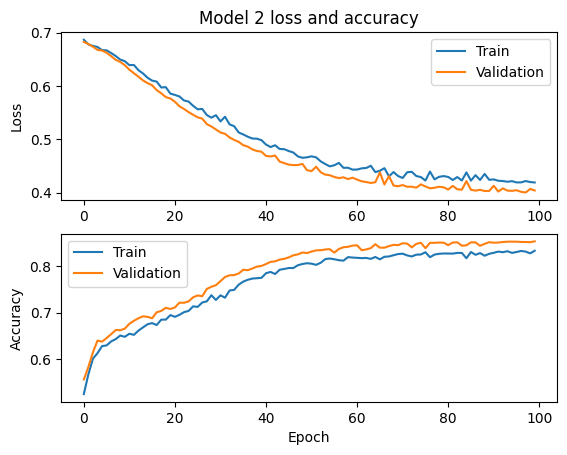

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_global            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ x_size (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2)         │          0 │ z_global[0][0],   │
│ (Concatenate)       │                   │            │ x_size[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 10)        │         30 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │        110 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         11 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

In [10]:
plotModelHistory(history2,2)
model2.summary()


In [11]:
#Make a model that has multpile layers
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
inputList = [input1, input2,input3,input4]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Dense(10,activation='relu')(inputs)
stack = tf.keras.layers.Dense(10)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model3 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
# callbacks=[]
# learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
# callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
# callbacks=[]
history3 = model3.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=150)

Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - binary_accuracy: 0.5230 - loss: 3.3328 - val_binary_accuracy: 0.5273 - val_loss: 1.1970
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - binary_accuracy: 0.4844 - loss: 1.2179 - val_binary_accuracy: 0.5150 - val_loss: 0.8379
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - binary_accuracy: 0.5055 - loss: 0.8546 - val_binary_accuracy: 0.5508 - val_loss: 0.7458
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - binary_accuracy: 0.5455 - loss: 0.7416 - val_binary_accuracy: 0.5782 - val_loss: 0.7014
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - binary_accuracy: 0.5941 - loss: 0.6883 - val_binary_accuracy: 0.5754 - val_loss: 0.6877
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - binary_accuracy: 0.5807 - loss: 0.6850 - val_binary_accuracy: 0.5724 - val_loss: 0.6862
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - binary_accuracy: 0.5986 - loss: 0.6557 - val_binary_accuracy: 0.5939 - val_loss: 0.6652
Epoch 

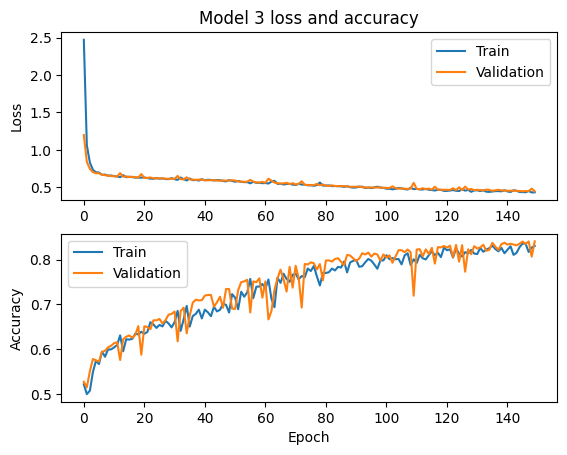

In [12]:
plotModelHistory(history3,3)

In [13]:
test_loss, test_acc = model.evaluate(validationODG)
print("sequential model validation test accuracy: "+str(test_acc))

test_loss, test_acc = model2.evaluate(validationODG)
print("model2 validation test accuracy: "+str(test_acc))

test_loss, test_acc = model3.evaluate(validationODG)
print("model3 validation test accuracy: "+str(test_acc))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - binary_accuracy: 0.6142 - loss: 0.6588
sequential model validation test accuracy: 0.6455199122428894
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - binary_accuracy: 0.8207 - loss: 0.4214
model2 validation test accuracy: 0.8542948365211487
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - binary_accuracy: 0.7966 - loss: 0.4833
model3 validation test accuracy: 0.8410286903381348


In [23]:
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
input5 = tf.keras.layers.Input(shape=(13,21), name="cluster")
# flatCluster = tf.keras.layers.Flatten()(input5)
inputList = [input5]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Conv1D(32,(3),input_shape=(13,21))(inputs)
stack = tf.keras.layers.Flatten()(stack)
stack = tf.keras.layers.Dense(10,activation='relu')(stack)
stack = tf.keras.layers.Dense(10)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model4 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

history4 = model4.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=50)
plotModelHistory(history4, 4)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - binary_accuracy: 0.5890 - loss: 0.7512

KeyboardInterrupt: 

In [ ]:
validation_dir = "./tf_records1000DanielWithTiming/tfrecords_validation/"
train_dir = "./tf_records1000DanielWithTiming/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile','cluster']
trainODG = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=[17,18,19])
validationODG = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=[17,18,19])
# trainODG._parse_tfrecord_fn()

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - binary_accuracy: 0.5271 - loss: 0.8869 - val_binary_accuracy: 0.5555 - val_loss: 0.6902
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - binary_accuracy: 0.5385 - loss: 0.6917 - val_binary_accuracy: 0.5890 - val_loss: 0.6817
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - binary_accuracy: 0.5724 - loss: 0.6830 - val_binary_accuracy: 0.6098 - val_loss: 0.6737
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - binary_accuracy: 0.5609 - loss: 0.6859 - val_binary_accuracy: 0.6413 - val_loss: 0.6637
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - binary_accuracy: 0.5185 - loss: 0.6902 - val_binary_accuracy: 0.6139 - val_loss: 0.6683
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - binary_accuracy: 0.6099 - loss: 0.6642 - val_binary_accuracy: 0.6491 - val_loss: 0.6491
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - binary_accuracy: 0.6260 - loss: 0.6714 - val_binary_accuracy: 0.6449 - val_loss: 0.6566
Epoch 8/20
6

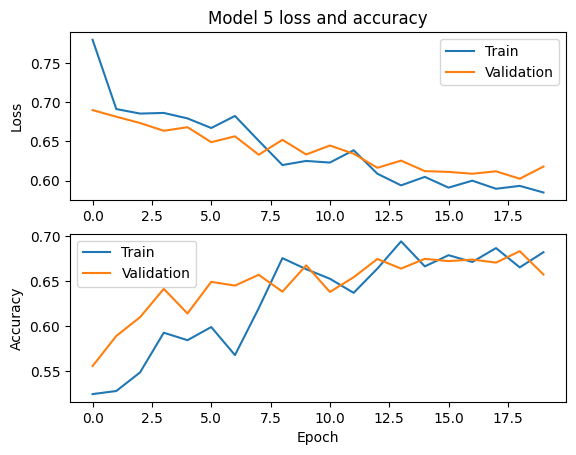

In [20]:
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
input5 = tf.keras.layers.Input(shape=(13,21,3), name="cluster")
# flatCluster = tf.keras.layers.Flatten()(input5)
inputList = [input5]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(13,21,3))(inputs)
stack = tf.keras.layers.MaxPool2D((2,2))(stack)
stack = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(stack)
stack = tf.keras.layers.Flatten()(stack)
stack = tf.keras.layers.Dense(16,activation='relu')(stack)
stack = tf.keras.layers.Dense(16)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model5 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

history5 = model5.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=20)
plotModelHistory(history5, 5)

In [17]:
test_loss, test_acc = model5.evaluate(validationODG)
print("model5 validation test accuracy: "+str(test_acc))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - binary_accuracy: 0.6345 - loss: 0.6216
model5 validation test accuracy: 0.681464433670044


Epoch 1/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - binary_accuracy: 0.5681 - loss: 0.9257 - val_binary_accuracy: 0.5959 - val_loss: 0.6774
Epoch 2/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - binary_accuracy: 0.5654 - loss: 0.6808 - val_binary_accuracy: 0.6201 - val_loss: 0.6569
Epoch 3/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - binary_accuracy: 0.6117 - loss: 0.6600 - val_binary_accuracy: 0.6851 - val_loss: 0.6251
Epoch 4/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - binary_accuracy: 0.5940 - loss: 0.6532 - val_binary_accuracy: 0.6184 - val_loss: 0.6593
Epoch 5/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - binary_accuracy: 0.5956 - loss: 0.6576 - val_binary_accuracy: 0.6480 - val_loss: 0.6132
Epoch 6/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - binary_accuracy: 0.6718 - loss: 0.6157 - val_binary_accuracy: 0.6899 - val_loss: 0.6181
Epoch 7/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - binary_accuracy: 0.6795 - loss: 0.6163 - val_binary_accuracy: 0.6492 - val_loss: 0.6353
Epoch 8/40
60

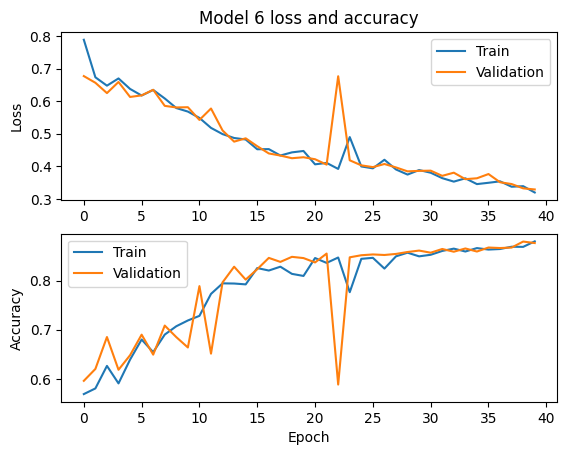

In [ ]:
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
input5 = tf.keras.layers.Input(shape=(13,21,3), name="cluster")
# flatCluster = tf.keras.layers.Flatten()(input5)
inputList = [input1, input5]
# inputs = tf.keras.layers.Concatenate()(inputList)
stackConv = tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(13,21,3))(input5)
stackConv = tf.keras.layers.MaxPool2D((2,2))(stackConv)
stackConv = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(stackConv)
stackConv = tf.keras.layers.Flatten()(stackConv)
stackSingles = tf.keras.layers.Dense(16,activation='relu')(input1)
# stackSingles = tf.keras.layers.Flatten()(stackSingles)
stack = tf.keras.layers.Concatenate()([stackSingles,stackConv])
stack = tf.keras.layers.Dense(16,activation='relu')(stack)
stack = tf.keras.layers.Dense(16)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model6 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks = []
history6 = model6.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=40)
plotModelHistory(history6, 6)


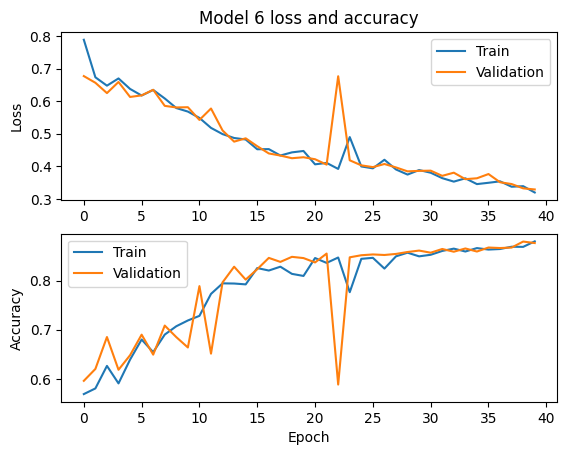

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - binary_accuracy: 0.8410 - loss: 0.3729
model6 validation test accuracy: 0.8765285611152649


In [23]:
plotModelHistory(history6,6)
test_loss, test_acc = model6.evaluate(validationODG)
print("model6 validation test accuracy: "+str(test_acc))

In [ ]:
saveModels = False;
if saveModels:
    filepath = "./DanielModels/model1.keras"
    model.save(filepath)
    filepath = "./DanielModels/model2.keras"
    model2.save(filepath)
    filepath = "./DanielModels/model3.keras"
    model3.save(filepath)
    filepath = "./DanielModels/model4.keras"
    model4.save(filepath)
    filepath = "./DanielModels/model5.keras"
    model5.save(filepath)
    filepath = "./DanielModels/model6.keras"
    model6.save(filepath)

In [42]:
validation_dir = "./tf_records3000DanielWithTiming/tfrecords_validation/"
train_dir = "./tf_records3000DanielWithTiming/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile','cluster']
trainODG7 = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=[10,11,12,13,14,15,16,17,18,19])
validationODG7 = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=[10,11,12,13,14,15,16,17,18,19])


In [43]:
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
input5 = tf.keras.layers.Input(shape=(13,21,10), name="cluster")
# flatCluster = tf.keras.layers.Flatten()(input5)
inputList = [input1, input5]
# inputs = tf.keras.layers.Concatenate()(inputList)
stackConv = tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(13,21,10))(input5)
stackConv = tf.keras.layers.MaxPool2D((2,2))(stackConv)
stackConv = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(stackConv)
stackConv = tf.keras.layers.Flatten()(stackConv)
stackSingles = tf.keras.layers.Dense(16,activation='relu')(input1)
# stackSingles = tf.keras.layers.Flatten()(stackSingles)
stack = tf.keras.layers.Concatenate()([stackSingles,stackConv])
stack = tf.keras.layers.Dense(16,activation='relu')(stack)
stack = tf.keras.layers.Dense(16)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model7 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks = []
history7 = model7.fit(x=trainODG7,validation_data=validationODG7, callbacks=callbacks,epochs=100)


/home/dabadjiev/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
 4/20 ━━━━━━━━━━━━━━━━━━━━ 7s 483ms/step - binary_accuracy: 0.5596 - loss: 0.8618

2025-06-13 11:57:31.825222: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_transpose_fusion', 320 bytes spill stores, 312 bytes spill loads



20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - binary_accuracy: 0.5772 - loss: 1.1466 - val_binary_accuracy: 0.4834 - val_loss: 0.6931
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - binary_accuracy: 0.5460 - loss: 0.6922 - val_binary_accuracy: 0.4445 - val_loss: 0.6926
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - binary_accuracy: 0.5810 - loss: 0.6848 - val_binary_accuracy: 0.4445 - val_loss: 0.6878
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - binary_accuracy: 0.3786 - loss: 0.6938 - val_binary_accuracy: 0.4445 - val_loss: 0.6882
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - binary_accuracy: 0.3809 - loss: 0.6847 - val_binary_accuracy: 0.4445 - val_loss: 0.6822
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - binary_accuracy: 0.5747 - loss: 0.6895 - val_binary_accuracy: 0.6507 - val_loss: 0.6709
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - binary_accuracy: 0.5731 - loss: 0.6446 - val_binary_accuracy: 0.6570 - val_loss: 0.6581
Epoch 8/100

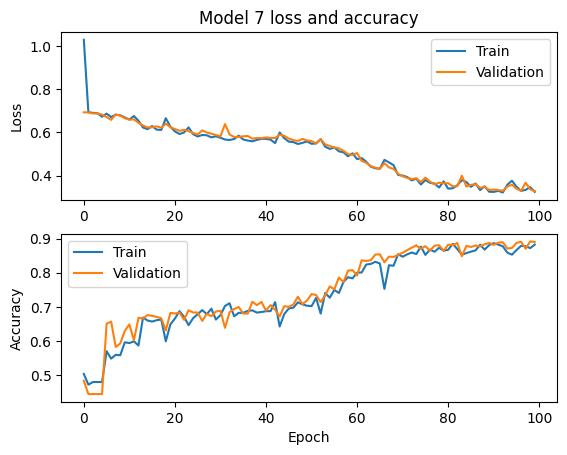

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - binary_accuracy: 0.8512 - loss: 0.3469
model7 validation test accuracy: 0.8897947072982788


In [44]:
plotModelHistory(history7,7)
test_loss, test_acc = model7.evaluate(validationODG7)
print("model7 validation test accuracy: "+str(test_acc))

In [50]:
validation_dir = "./tf_records3000DanielWith20Timing/tfrecords_validation/"
train_dir = "./tf_records3000DanielWith20Timing/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile','cluster']
trainODG8 = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=list(range(20)))
validationODG8 = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=list(range(20)))
nBatches=len([f for f in os.listdir(train_dir) if ".tfrecord" in f])
print(nBatches)


20


In [ ]:
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
input5 = tf.keras.layers.Input(shape=(13,21,20), name="cluster")
# flatCluster = tf.keras.layers.Flatten()(input5)
inputList = [input1, input5]
# inputs = tf.keras.layers.Concatenate()(inputList)
stackConv = tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(13,21,20))(input5)
stackConv = tf.keras.layers.MaxPool2D((2,2))(stackConv)
stackConv = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(stackConv)
stackConv = tf.keras.layers.Flatten()(stackConv)
stackSingles = tf.keras.layers.Dense(16,activation='relu')(input1)
# stackSingles = tf.keras.layers.Flatten()(stackSingles)
stack = tf.keras.layers.Concatenate()([stackSingles,stackConv])
stack = tf.keras.layers.Dense(16,activation='relu')(stack)
stack = tf.keras.layers.Dense(16)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model8 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()
#copied from Eliza's FilteringModel.py
learning_rate: float = 0.01
nSteps: int = 500
decay_steps = nSteps*nBatches
warmup_steps = int(nSteps*nBatches/10)
warmup_target = learning_rate
lr_scheduler = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate=learning_rate/3, decay_steps=decay_steps,warmup_steps=warmup_steps, alpha=learning_rate/5, warmup_target=warmup_target)
        
# model8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_scheduler), loss='binary_crossentropy', metrics=['binary_accuracy'])
model8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks = []
history8 = model8.fit(x=trainODG8,validation_data=validationODG8, callbacks=callbacks,epochs=100)


/home/dabadjiev/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
 4/20 ━━━━━━━━━━━━━━━━━━━━ 7s 492ms/step - binary_accuracy: 0.2291 - loss: 1.1815

2025-06-13 12:44:49.160798: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_transpose_fusion', 320 bytes spill stores, 312 bytes spill loads



20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - binary_accuracy: 0.3580 - loss: 0.8944 - val_binary_accuracy: 0.5699 - val_loss: 0.6903
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - binary_accuracy: 0.5297 - loss: 0.6925 - val_binary_accuracy: 0.5764 - val_loss: 0.6882
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - binary_accuracy: 0.6245 - loss: 0.6868 - val_binary_accuracy: 0.4445 - val_loss: 0.9248
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - binary_accuracy: 0.4382 - loss: 0.8619 - val_binary_accuracy: 0.5596 - val_loss: 0.6778
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - binary_accuracy: 0.4894 - loss: 0.6827 - val_binary_accuracy: 0.5793 - val_loss: 0.6874
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - binary_accuracy: 0.5066 - loss: 0.6858 - val_binary_accuracy: 0.6052 - val_loss: 0.6841
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - binary_accuracy: 0.5681 - loss: 0.6855 - val_binary_accuracy: 0.5789 - val_loss: 0.6850
Epoch 8/200

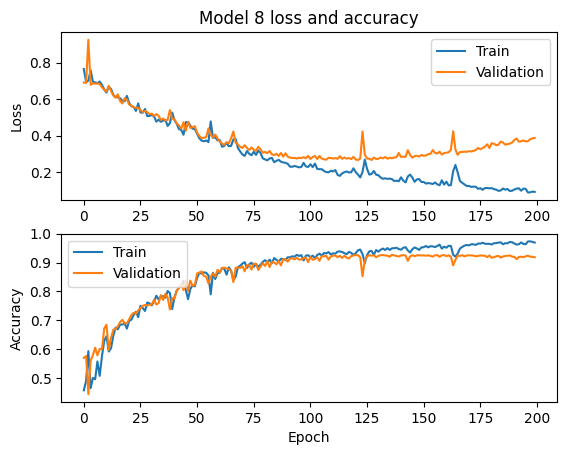

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - binary_accuracy: 0.9115 - loss: 0.3571
model8 validation test accuracy: 0.9186986088752747


In [58]:
plotModelHistory(history8,8)
test_loss, test_acc = model8.evaluate(validationODG8)
print("model8 validation test accuracy: "+str(test_acc))

In [48]:
saveModels = True;
if saveModels:
    filepath = "./DanielModels/model7.keras"
    model7.save(filepath)
    filepath = "./DanielModels/model8.keras"
    model8.save(filepath)